In [ ]:
pip install fuzzy-c-means

In [ ]:
pip install scikit-learn-extra

In [ ]:
pip install sklearn-som

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving turkiye-student-evaluation_generic.csv to turkiye-student-evaluation_generic (2).csv
User uploaded file "turkiye-student-evaluation_generic.csv" with length 391968 bytes


In [ ]:
df=pd.read_csv("turkiye-student-evaluation_generic.csv")

In [ ]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
'''Dataset Description

instr: Instructor's identifier; values taken from {1,2,3}
class: Course code (descriptor); values taken from {1-13}
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}
Q1: The semester course content, teaching method and evaluation system were provided at the start.
Q2: The course aims and objectives were clearly stated at the beginning of the period.
Q3: The course was worth the amount of credit assigned to it.
Q4: The course was taught according to the syllabus announced on the first day of class.
Q5: The class discussions, homework assignments, applications and studies were satisfactory.
Q6: The textbook and other courses resources were sufficient and up to date.
Q7: The course allowed field work, applications, laboratory, discussion and other studies.
Q8: The quizzes, assignments, projects and exams contributed to helping the learning.
Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.
Q10: My initial expectations about the course were met at the end of the period or year.
Q11: The course was relevant and beneficial to my professional development.
Q12: The course helped me look at life and the world with a new perspective.
Q13: The Instructor's knowledge was relevant and up to date.
Q14: The Instructor came prepared for classes.
Q15: The Instructor taught in accordance with the announced lesson plan.
Q16: The Instructor was committed to the course and was understandable.
Q17: The Instructor arrived on time for classes.
Q18: The Instructor has a smooth and easy to follow delivery/speech.
Q19: The Instructor made effective use of class hours.
Q20: The Instructor explained the course and was eager to be helpful to students.
Q21: The Instructor demonstrated a positive approach to students.
Q22: The Instructor was open and respectful of the views of students about the course.
Q23: The Instructor encouraged participation in the course.
Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.
Q25: The Instructor responded to questions about the course inside and outside of the course.
Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.
Q27: The Instructor provided solutions to exams and discussed them with students.
Q28: The Instructor treated all students in a right and objective manner.

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}'''

"Dataset Description\n\ninstr: Instructor's identifier; values taken from {1,2,3}\nclass: Course code (descriptor); values taken from {1-13}\nrepeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}\nattendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}\ndifficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}\nQ1: The semester course content, teaching method and evaluation system were provided at the start.\nQ2: The course aims and objectives were clearly stated at the beginning of the period.\nQ3: The course was worth the amount of credit assigned to it.\nQ4: The course was taught according to the syllabus announced on the first day of class.\nQ5: The class discussions, homework assignments, applications and studies were satisfactory.\nQ6: The textbook and other courses resources were sufficient and up to date.\nQ7: The course allowed field work, applications, laboratory, discussion a

In [ ]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [ ]:
df.isnull().any()

instr         False
class         False
nb.repeat     False
attendance    False
difficulty    False
Q1            False
Q2            False
Q3            False
Q4            False
Q5            False
Q6            False
Q7            False
Q8            False
Q9            False
Q10           False
Q11           False
Q12           False
Q13           False
Q14           False
Q15           False
Q16           False
Q17           False
Q18           False
Q19           False
Q20           False
Q21           False
Q22           False
Q23           False
Q24           False
Q25           False
Q26           False
Q27           False
Q28           False
dtype: bool

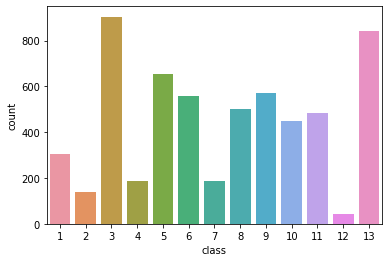

In [ ]:
sns.countplot(x='class', data=df)

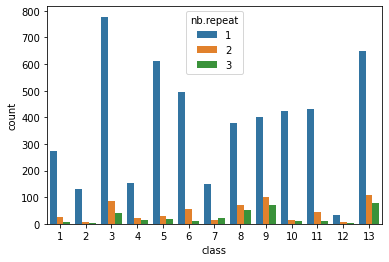

In [ ]:
sns.countplot(x="class",hue="nb.repeat",data=df)

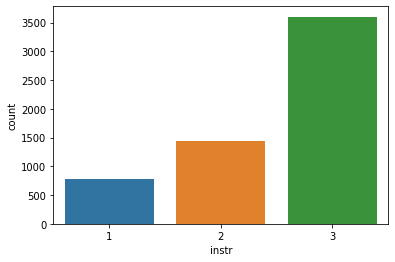

In [ ]:
sns.countplot(x='instr', data=df)

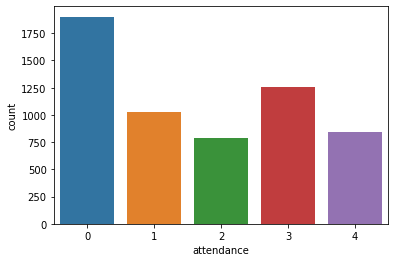

In [ ]:
sns.countplot(x='attendance', data=df)

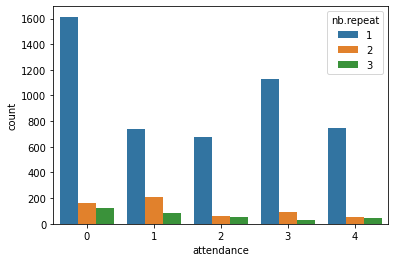

In [ ]:
sns.countplot(x="attendance",hue="nb.repeat",data=df)

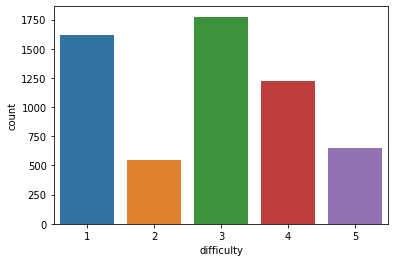

In [ ]:
sns.countplot(x='difficulty', data=df)

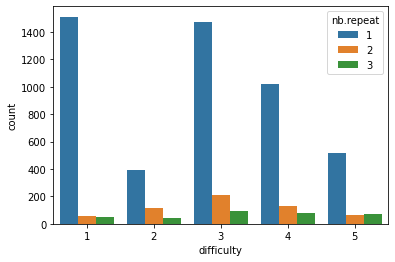

In [ ]:
sns.countplot(x="difficulty",hue="nb.repeat",data=df)

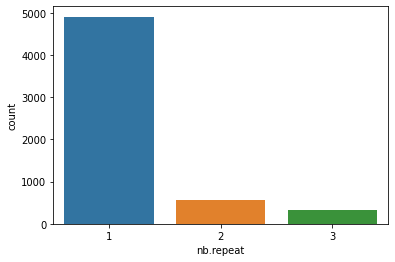

In [ ]:
sns.countplot(x="nb.repeat",data=df)

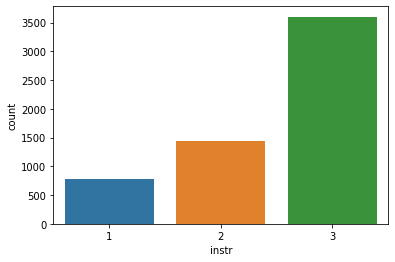

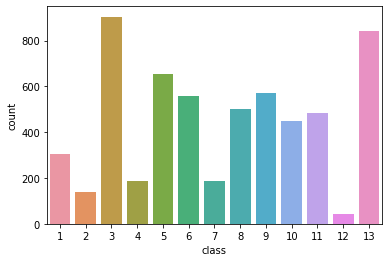

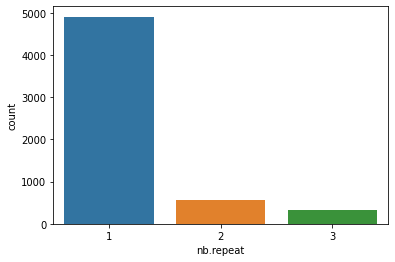

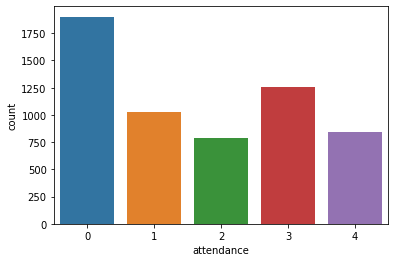

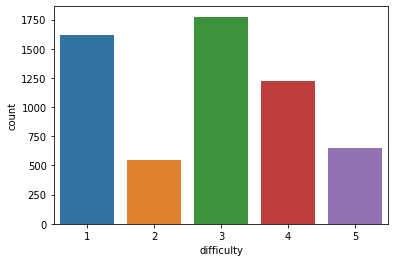

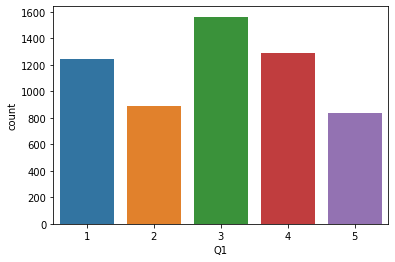

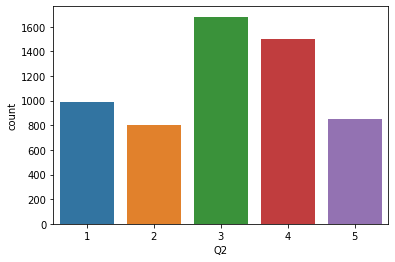

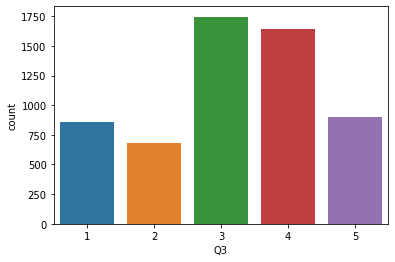

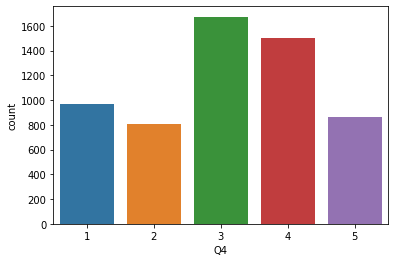

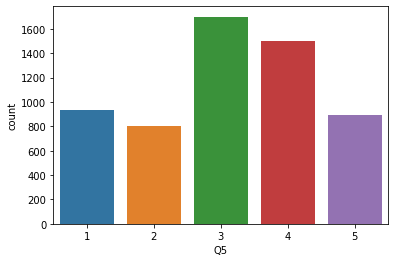

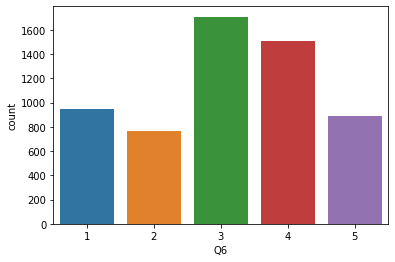

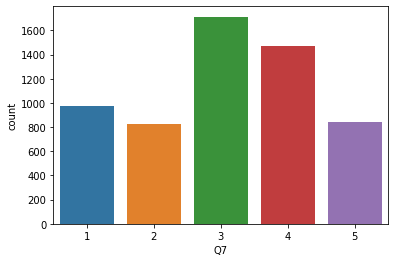

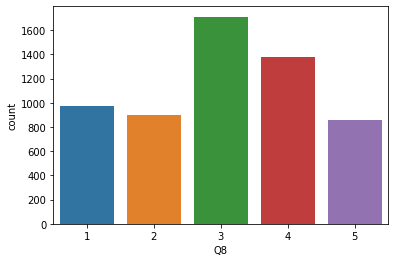

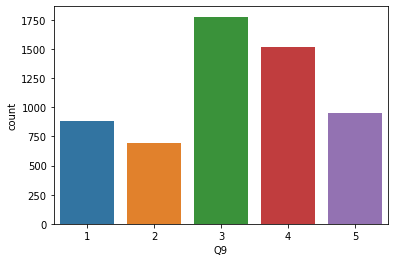

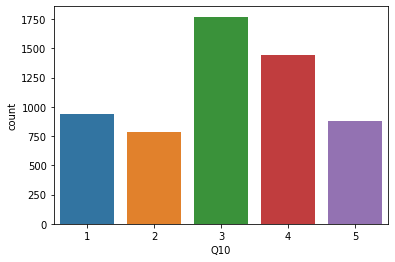

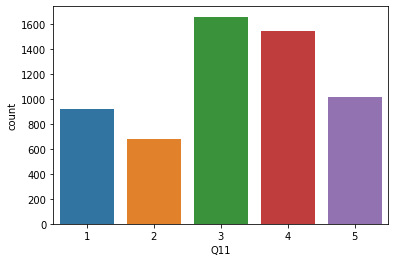

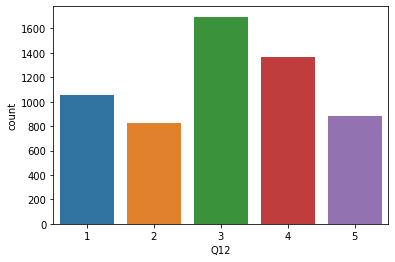

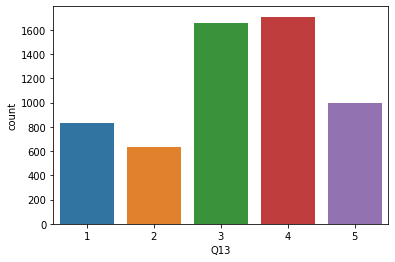

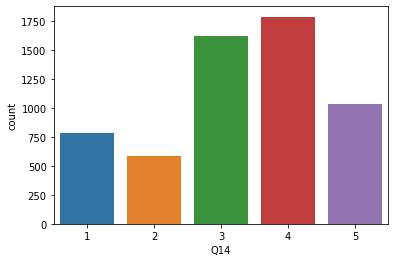

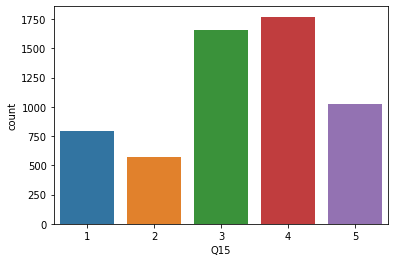

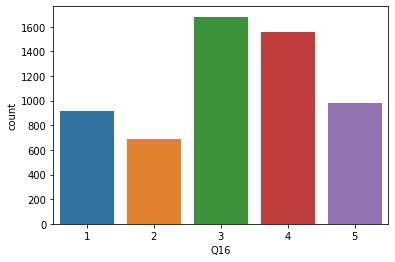

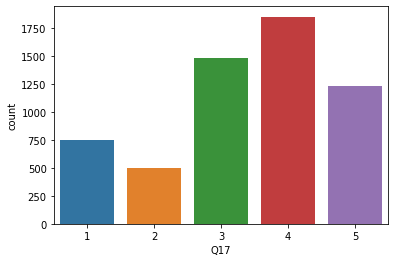

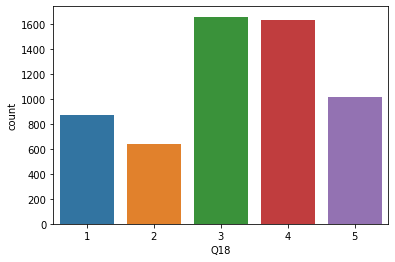

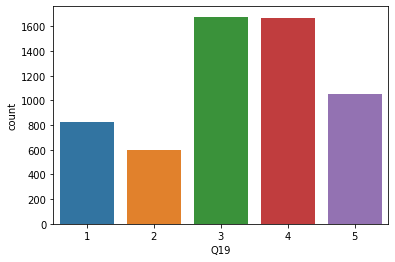

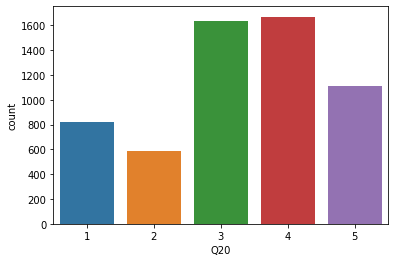

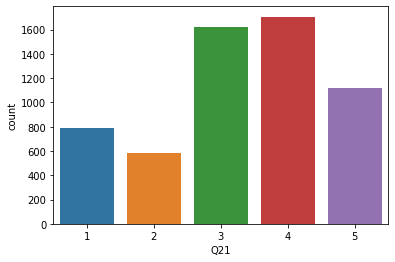

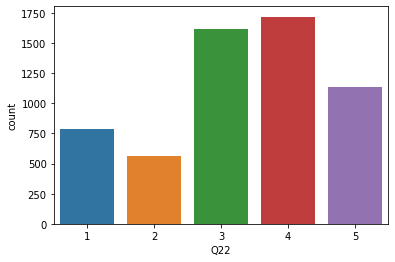

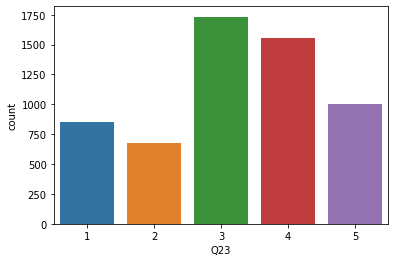

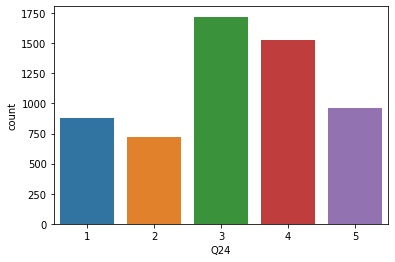

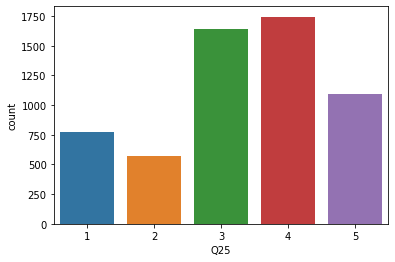

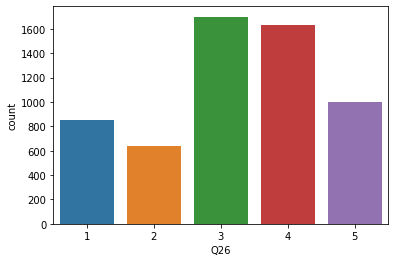

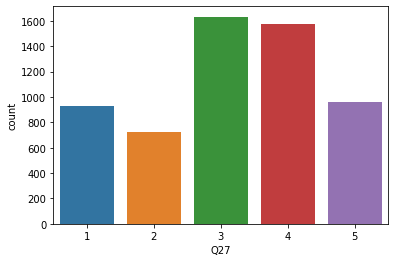

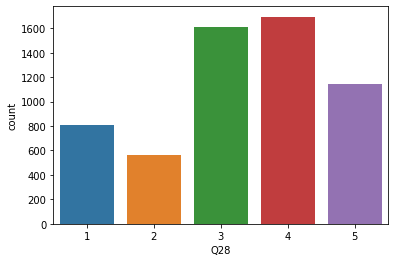

In [ ]:
for i in df.columns:
  sns.countplot(x=i,data=df)
  plt.show()

In [ ]:
df_temp=df

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_norm=scaler.fit_transform(df)

In [ ]:
df_norm

array([[-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       ...,
       [ 0.71607035,  1.55204221, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036]])

In [ ]:
df_norm.shape

(5820, 33)

In [ ]:
dataset_ques=df_norm[:,5:33]

In [ ]:
dataset_ques.shape

(5820, 28)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_norm = pca.fit_transform(df_norm)
dataset_ques = pca.fit_transform(dataset_ques)

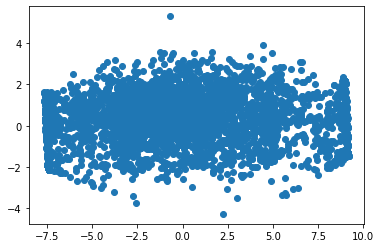

In [ ]:
plt.scatter(df_norm[:,0],df_norm[:,1])

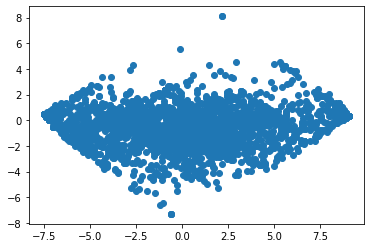

In [ ]:
plt.scatter(dataset_ques[:,0],dataset_ques[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_norm, test_size=0.3, random_state=42)
X_train_q, X_test_q = train_test_split(dataset_ques, test_size=0.3, random_state=42)
#X_train_q_som, X_test_q_som = train_test_split(X_train_q_som, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(4074, 2)

In [ ]:
X_test.shape

(1746, 2)

In [ ]:
X_train_kmeans=X_train
X_train_kmed=X_train
X_train_q1=X_train_q
X_train_q_kmeans=X_train_q1
X_train_q_kmed=X_train_q1
X_train_q_gm=X_train_q1
X_train_q_som=X_train_q1
X_train_q_fcm=X_train_q1

In [ ]:


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X_train_kmeans)

In [ ]:
kmeans.inertia_

17644.091454218564

In [ ]:
silhouette_score(X_train_kmeans, y_kmeans)

0.5256532704860613

In [ ]:
y_kmeans=kmeans.predict(X_test)

In [ ]:
silhouette_score(X_test, y_kmeans)

0.53851294763435

In [ ]:
#kmeans.predict(X_val)

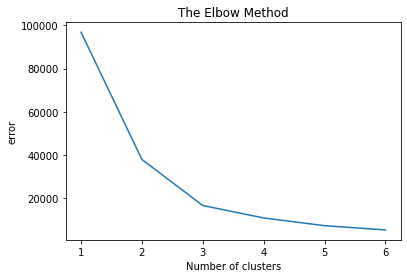

In [ ]:
from sklearn.cluster import KMeans
error = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_q_kmeans)
    error.append(kmeans.inertia_)
plt.plot(range(1, 7), error)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('error')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X_train_q_kmeans)

In [ ]:
kmeans.inertia_

16692.7911627901

In [ ]:
silhouette_score(X_train_q_kmeans, y_kmeans)

0.5682546223512742

In [ ]:
y_k=kmeans.predict(X_test_q)

In [ ]:
silhouette_score(X_test_q, y_k)

0.5880221911328556

In [ ]:
#Applying kmediods

In [ ]:
from sklearn_extra.cluster import KMedoids

wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [ ]:
kmedoids = KMedoids(n_clusters=5, random_state=43)
y_kmed = kmedoids.fit_predict(X_train_q_kmed)
#kmedoids.labels_

In [ ]:
kmedoids.cluster_centers_

array([[-3.35946227,  0.45324548],
       [ 0.78287487,  0.4050173 ],
       [-1.34455794, -1.60307731],
       [ 9.06754915,  0.30856096],
       [ 4.92521201,  0.35678913]])

In [ ]:
kmedoids.inertia_

4751.056449826996

In [ ]:
silhouette_score(X_train_q_kmed, y_kmed)

0.5512440689637985

In [ ]:
y_k=kmedoids.predict(X_test_q)

In [ ]:
silhouette_score(X_test, y_k)

0.3952165170876451

In [ ]:
from sklearn_som.som import SOM

In [ ]:
som = SOM(m=3, n=1, dim=2)
y_som = som.fit_predict(X_train_q_som)
#y_som.labels_

In [ ]:
plt.scatter(X_train_q_som[y_som == 0, 0], X_train_q_som[y_som == 0, 1], s = 10, c = 'black', label = 'Cluster 1')
plt.scatter(X_train_q_som[y_som == 1, 0], X_train_q_som[y_som == 1, 1], s = 10, c = 'silver', label = 'Cluster 2')
plt.scatter(X_train_q_som[y_som == 2, 0], X_train_q_som[y_som == 2, 1], s = 10, c = 'gray', label = 'Cluster 3')
#plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Predicted Clusters of students')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
silhouette_score(X_train_q_som, y_som)

0.5343854097421772

In [ ]:
y_som_k=som.predict(X_test_q)

In [ ]:
plt.scatter(X_test_q[y_som_k == 0, 0], X_test_q[y_som_k == 0, 1], s = 10, c = 'black', label = 'Cluster 1')
plt.scatter(X_test_q[y_som_k == 1, 0], X_test_q[y_som_k == 1, 1], s = 10, c = 'silver', label = 'Cluster 2')
plt.scatter(X_test_q[y_som_k == 2, 0], X_test_q[y_som_k == 2, 1], s = 10, c = 'gray', label = 'Cluster 3')
#plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Predicted Clusters of students')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
silhouette_score(X_test_q, y_som_k)

0.5565285064593842

In [ ]:
def calc_sse(centers,x,y):
  sse=0
  for i in range(x.shape[0]):
    sse+=np.sum((x[i]-centers[y[i]])**2)

  return sse

In [ ]:
from fcmeans import FCM
fcm = FCM(n_clusters=3)
fcm.fit(X_train_q_fcm)
y_fcm=fcm.predict(X_train_q_fcm)

In [ ]:
fcm.centers

array([[ 0.81324002, -0.09594039],
       [ 7.85189213,  0.25467895],
       [-4.68890264,  0.1767145 ]])

In [ ]:
calc_sse(fcm.centers,X_train_q_fcm,y_fcm)

17031.373702150348

In [ ]:
silhouette_score(X_train_q_fcm, y_fcm)

0.5673030300232327

In [ ]:
y_fcm=fcm.predict(X_test_q)

In [ ]:
calc_sse(fcm.centers,X_test_q,y_fcm)

7071.271122907684

In [ ]:
silhouette_score(X_test_q, y_fcm)

0.5879116428801142

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(dataframe.corr())
plt.show()

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=7, covariance_type='tied', random_state=0)
y_gm=gm.fit_predict(X_train_q_gm)

In [ ]:
plt.scatter(X_train_q_som[y_gm == 0, 0], X_train_q_som[y_gm == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_train_q_som[y_gm == 1, 0], X_train_q_som[y_gm == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train_q_som[y_gm == 2, 0], X_train_q_som[y_gm == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_train_q_som[y_gm == 3, 0], X_train_q_som[y_gm == 3, 1], s = 10, c = 'gray', label = 'Cluster 4')
plt.scatter(X_train_q_som[y_gm == 4, 0], X_train_q_som[y_gm == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(X_train_q_som[y_gm == 5, 0], X_train_q_som[y_gm == 5, 1], s = 10, c = 'orange', label = 'Cluster 6')
plt.scatter(X_train_q_som[y_gm == 6, 0], X_train_q_som[y_gm == 6, 1], s = 10, c = 'yellow', label = 'Cluster 7')
#plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Predicted Clusters of students')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
silhouette_score(X_train_q_gm, y_gm)

0.6178311062081623

In [ ]:
y_gm=gm.predict(X_test_q)

In [ ]:
plt.scatter(X_test_q[y_gm == 0, 0], X_test_q[y_gm == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_test_q[y_gm == 1, 0], X_test_q[y_gm == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test_q[y_gm == 2, 0], X_test_q[y_gm == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_test_q[y_gm == 3, 0], X_test_q[y_gm == 3, 1], s = 10, c = 'gray', label = 'Cluster 4')
plt.scatter(X_test_q[y_gm == 4, 0], X_test_q[y_gm == 4, 1], s = 10, c = 'black', label = 'Cluster 5')
plt.scatter(X_test_q[y_gm == 5, 0], X_test_q[y_gm == 5, 1], s = 10, c = 'orange', label = 'Cluster 6')
plt.scatter(X_test_q[y_gm == 6, 0], X_test_q[y_gm == 6, 1], s = 10, c = 'yellow', label = 'Cluster 7')
#plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Predicted Clusters of students')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
silhouette_score(X_test_q, y_gm)

0.6395728071660481